In [62]:
import numpy as np
import PIL
import os
import PIL.Image
import matplotlib.pyplot as plt

import tensorflow as tf
import tensorflow_datasets as tfds
tf.__version__

'2.6.2'

In [19]:
print(len(tfds.list_builders()))
print(list(filter(lambda x: x.find('flo') >= 0, tfds.list_builders())))
#tfds.list_builders()

1041
['flores', 'oxford_flowers102', 'tf_flowers', 'huggingface:flores']


['abstract_reasoning',
 'accentdb',
 'aeslc',
 'aflw2k3d',
 'ag_news_subset',
 'ai2_arc',
 'ai2_arc_with_ir',
 'amazon_us_reviews',
 'anli',
 'arc',
 'bair_robot_pushing_small',
 'bccd',
 'beans',
 'big_patent',
 'bigearthnet',
 'billsum',
 'binarized_mnist',
 'binary_alpha_digits',
 'blimp',
 'bool_q',
 'c4',
 'caltech101',
 'caltech_birds2010',
 'caltech_birds2011',
 'cars196',
 'cassava',
 'cats_vs_dogs',
 'celeb_a',
 'celeb_a_hq',
 'cfq',
 'cherry_blossoms',
 'chexpert',
 'cifar10',
 'cifar100',
 'cifar10_1',
 'cifar10_corrupted',
 'citrus_leaves',
 'cityscapes',
 'civil_comments',
 'clevr',
 'clic',
 'clinc_oos',
 'cmaterdb',
 'cnn_dailymail',
 'coco',
 'coco_captions',
 'coil100',
 'colorectal_histology',
 'colorectal_histology_large',
 'common_voice',
 'coqa',
 'cos_e',
 'cosmos_qa',
 'covid19',
 'covid19sum',
 'crema_d',
 'curated_breast_imaging_ddsm',
 'cycle_gan',
 'd4rl_adroit_door',
 'd4rl_adroit_hammer',
 'd4rl_adroit_pen',
 'd4rl_adroit_relocate',
 'd4rl_mujoco_ant',
 'd4

In [20]:
(training_set, validation_set), data_info = tfds.load('tf_flowers', 
                                                 split=['train[:70%]', 'train[70%:]'],
                                                as_supervised = True,
                                                with_info = True)

In [84]:
num_classes = data_info.features['label'].num_classes
number_training_set = len(training_set)
number_validation_set = len(validation_set)

print('Number of classes:', num_classes)
print('Number of Training Images:', len(training_set))
print('Number of Validation Images:', len(validation_set))

Number of classes: 5
Number of Training Images: 2569
Number of Validation Images: 1101


In [61]:
for example in enumerate(training_set.take(10)):
    print('Image '+str(example[0])+' Shape:', example[1][0].shape, 'label: ', example[1][1].numpy())

Image 0 Shape: (333, 500, 3) label:  2
Image 1 Shape: (212, 320, 3) label:  3
Image 2 Shape: (240, 320, 3) label:  3
Image 3 Shape: (240, 320, 3) label:  4
Image 4 Shape: (317, 500, 3) label:  3
Image 5 Shape: (212, 320, 3) label:  0
Image 6 Shape: (240, 240, 3) label:  0
Image 7 Shape: (333, 500, 3) label:  0
Image 8 Shape: (240, 320, 3) label:  0
Image 9 Shape: (240, 320, 3) label:  1


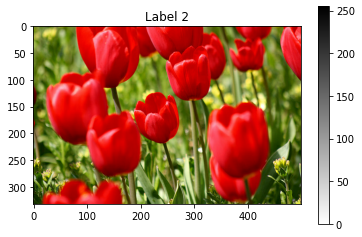

In [82]:
for image in training_set.take(1):
    plt.imshow(image[0].numpy(), cmap=plt.cm.binary)
    plt.title('Label '+str(image[1].numpy()))
    plt.colorbar()
    plt.show()

### Reformat Images and Create Batches

In [83]:
IMAGE_SIZE = 224

def format_image(image, label):
    image = tf.image.resize(image, (IMAGE_SIZE, IMAGE_SIZE)) / 255.0
    return image, label

In [85]:
BATCH_SIZE = 16

training_batches = training_set.shuffle(number_training_set // 4).map(format_image).batch(BATCH_SIZE).prefetch(1)

validation_batches = validation_set.map(format_image).batch(BATCH_SIZE).prefetch(1)

In [87]:
print(training_batches)
print(validation_batches)

<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>
<PrefetchDataset shapes: ((None, 224, 224, 3), (None,)), types: (tf.float32, tf.int64)>


In [127]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu', input_shape = (224, 224, 3)))
model.add(tf.keras.layers.Conv2D(64, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(64, (5, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(64, (1, 5), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(128, (5, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(128, (1, 5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(128, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(128, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Conv2D(256, (5, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256, (1, 5), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(256, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(256, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.MaxPooling2D(pool_size = (2, 2)))
model.add(tf.keras.layers.Conv2D(512, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(512, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(512, (3, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(512, (1, 3), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(512, (5, 1), activation = 'relu'))
model.add(tf.keras.layers.Conv2D(512, (1, 5), activation = 'relu'))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation = 'relu'))
model.add(tf.keras.layers.Dense(num_classes, activation = 'softmax'))
model.summary()

Model: "sequential_38"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_375 (Conv2D)          (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_376 (Conv2D)          (None, 220, 222, 64)      6208      
_________________________________________________________________
conv2d_377 (Conv2D)          (None, 220, 220, 64)      12352     
_________________________________________________________________
max_pooling2d_129 (MaxPoolin (None, 110, 110, 64)      0         
_________________________________________________________________
conv2d_378 (Conv2D)          (None, 106, 110, 64)      20544     
_________________________________________________________________
conv2d_379 (Conv2D)          (None, 106, 106, 64)      20544     
_________________________________________________________________
dropout_19 (Dropout)         (None, 106, 106, 64)    

In [128]:
model.compile(optimizer = 'adam',
             loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

In [129]:
model_ckpt = tf.keras.callbacks.ModelCheckpoint('flower_best_model.h5', 
                                                verbose=1, 
                                                save_best_only=True
                                               )

In [ ]:
EPOCHS = 15

history = model.fit(training_batches,
                    batch_size=16,
                    epochs=EPOCHS,
                    verbose=1,
                    callbacks=[model_ckpt],
                    validation_data=validation_batches
                   )

In [130]:
import tensorflow_hub as hub

In [131]:
URL = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

feature_extractor = hub.KerasLayer(URL, input_shape = (IMAGE_SIZE, IMAGE_SIZE, 3))

In [132]:
feature_extractor.trainable = False

In [134]:
model = tf.keras.Sequential([
    feature_extractor,
    tf.keras.layers.Dense(num_classes)
])
model.summary()

Model: "sequential_40"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer (KerasLayer)     (None, 1280)              2257984   
_________________________________________________________________
dense_3 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________
